# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [61]:
#Import all the necessary modules.
%matplotlib inline 
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer

from scipy.stats import zscore
import scipy.stats as stats

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [62]:
# Read the data as a data frame
df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [63]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [64]:
# Performing basic EDA - Data type of each attribute.  
print("Data type of Dataset :\n",df.dtypes)

Data type of Dataset :
 Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [65]:
# Performing basic EDA - Shape of the data.    
print("Shape of Dataset :",df.shape)

Shape of Dataset : (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [66]:
## Performing basic EDA - Checking the presence of missing values. 
print("Checking the presence of missing values :", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Checking the presence of missing values : None


In [67]:
# Replace all the 0s in the column with the median of the same column value except Class.  

df['Preg']=df['Preg'].replace(0,df['Preg'].median())
df['Plas']=df['Plas'].replace(0,df['Plas'].median())
df['Pres']=df['Pres'].replace(0,df['Pres'].median())
df['skin']=df['skin'].replace(0,df['skin'].median())
df['test']=df['test'].replace(0,df['test'].median())
df['mass']=df['mass'].replace(0,df['mass'].median())
df['pedi']=df['pedi'].replace(0,df['pedi'].median())
df['age']=df['age'].replace(0,df['age'].median())
df.head(18)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [68]:
# Performing basic EDA - Descriptive Statistics or 5 point Summary of Numerical Attributes.
print("Descriptive Statistics :\n",df.describe(include="all"))

Descriptive Statistics :
              Preg        Plas        Pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     4.278646  121.656250   72.386719   27.334635   94.652344   32.450911   
std      3.021516   30.438286   12.096642    9.229014  105.547598    6.875366   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.750000   64.000000   23.000000   30.500000   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   31.250000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.0

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

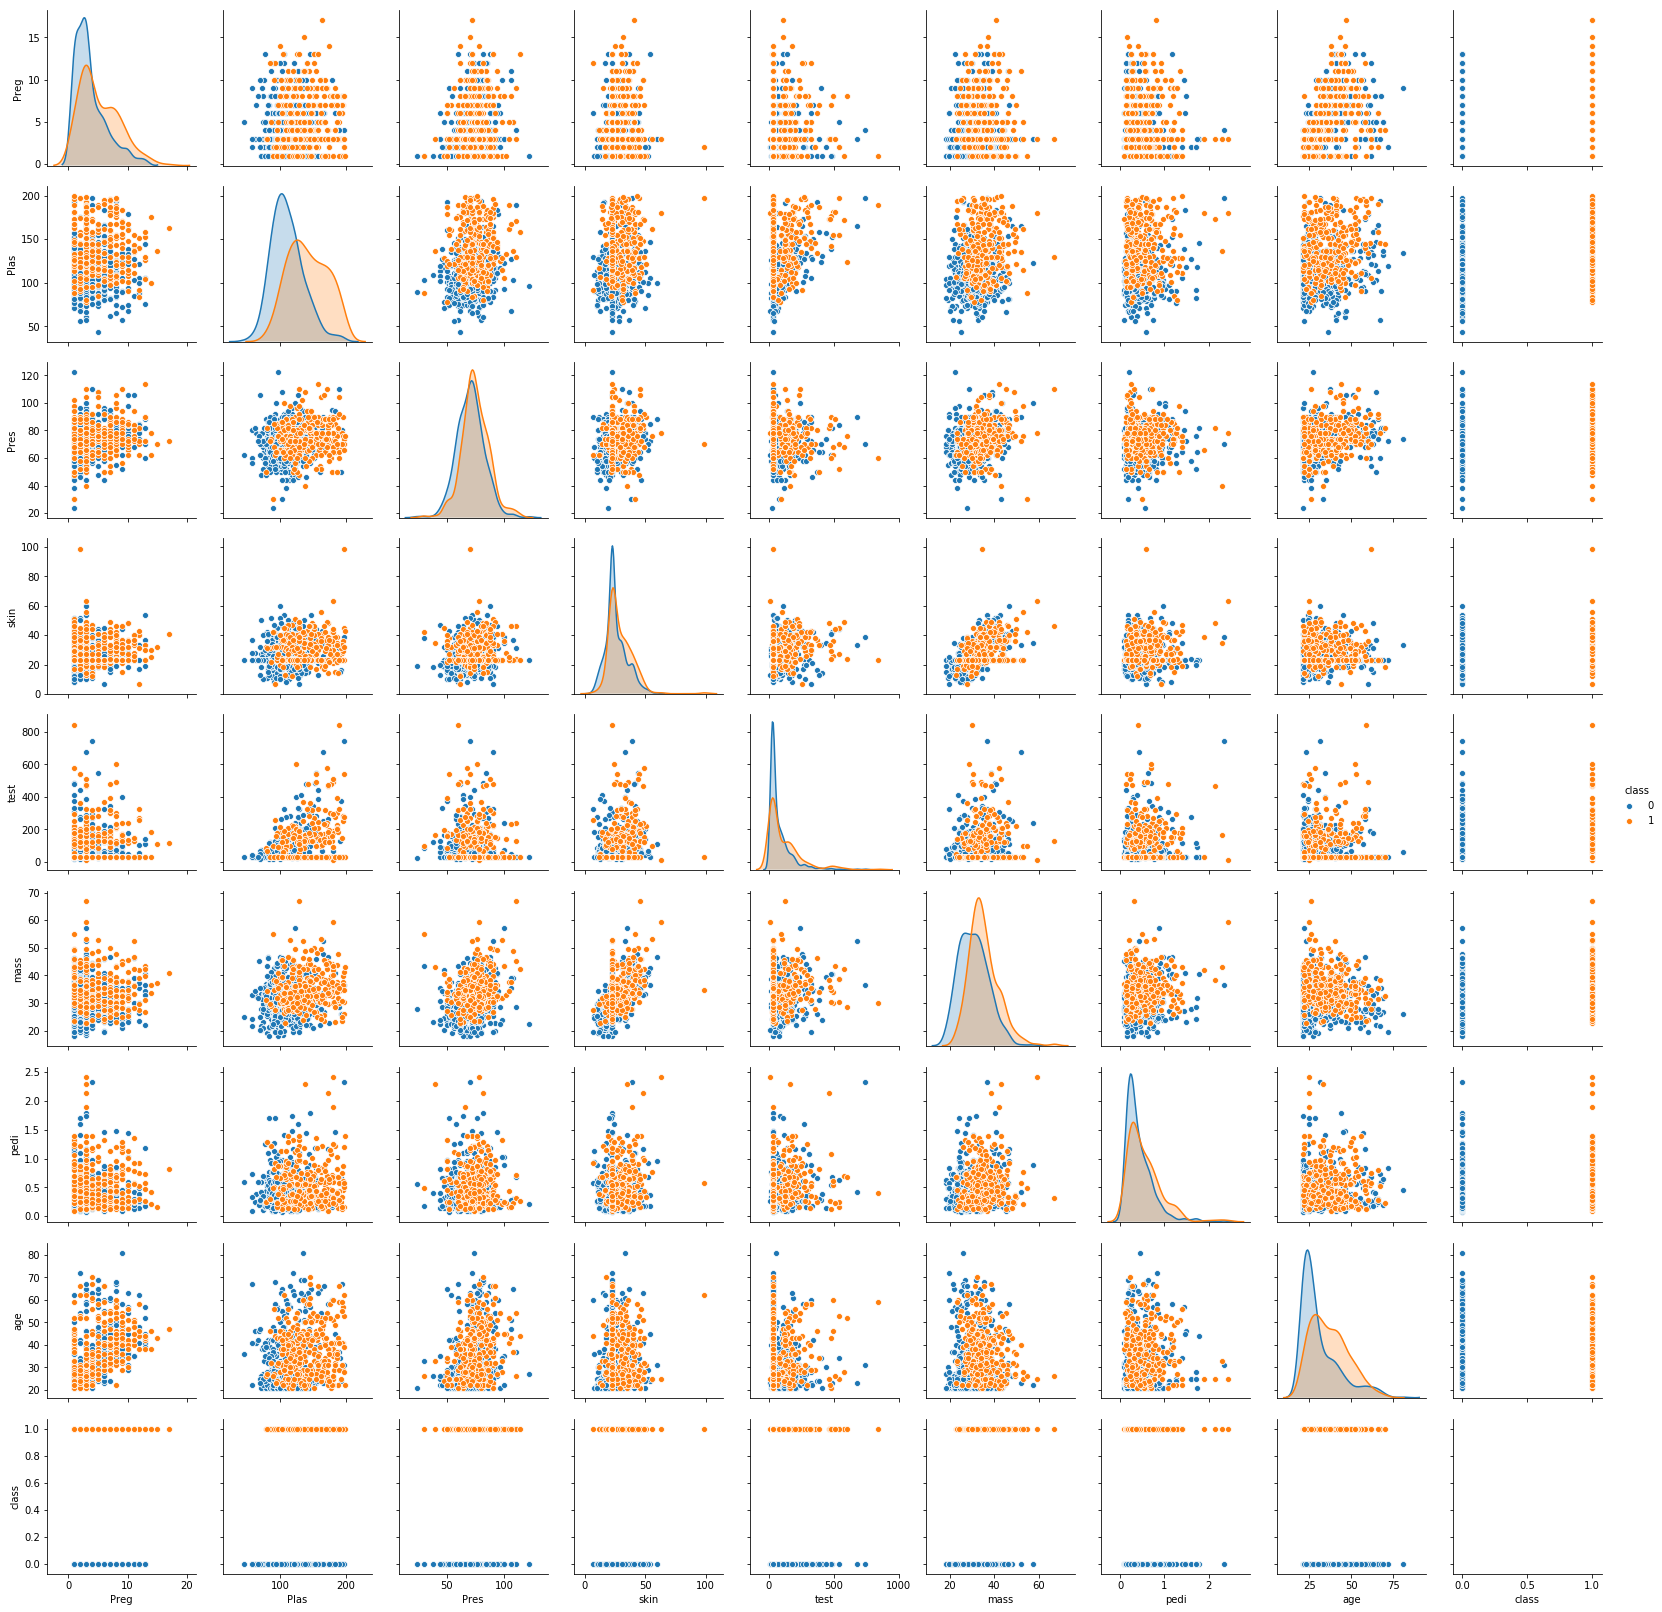

In [69]:
# Look at the distribution of class values and other attributes.
sns.pairplot(df, hue='class')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


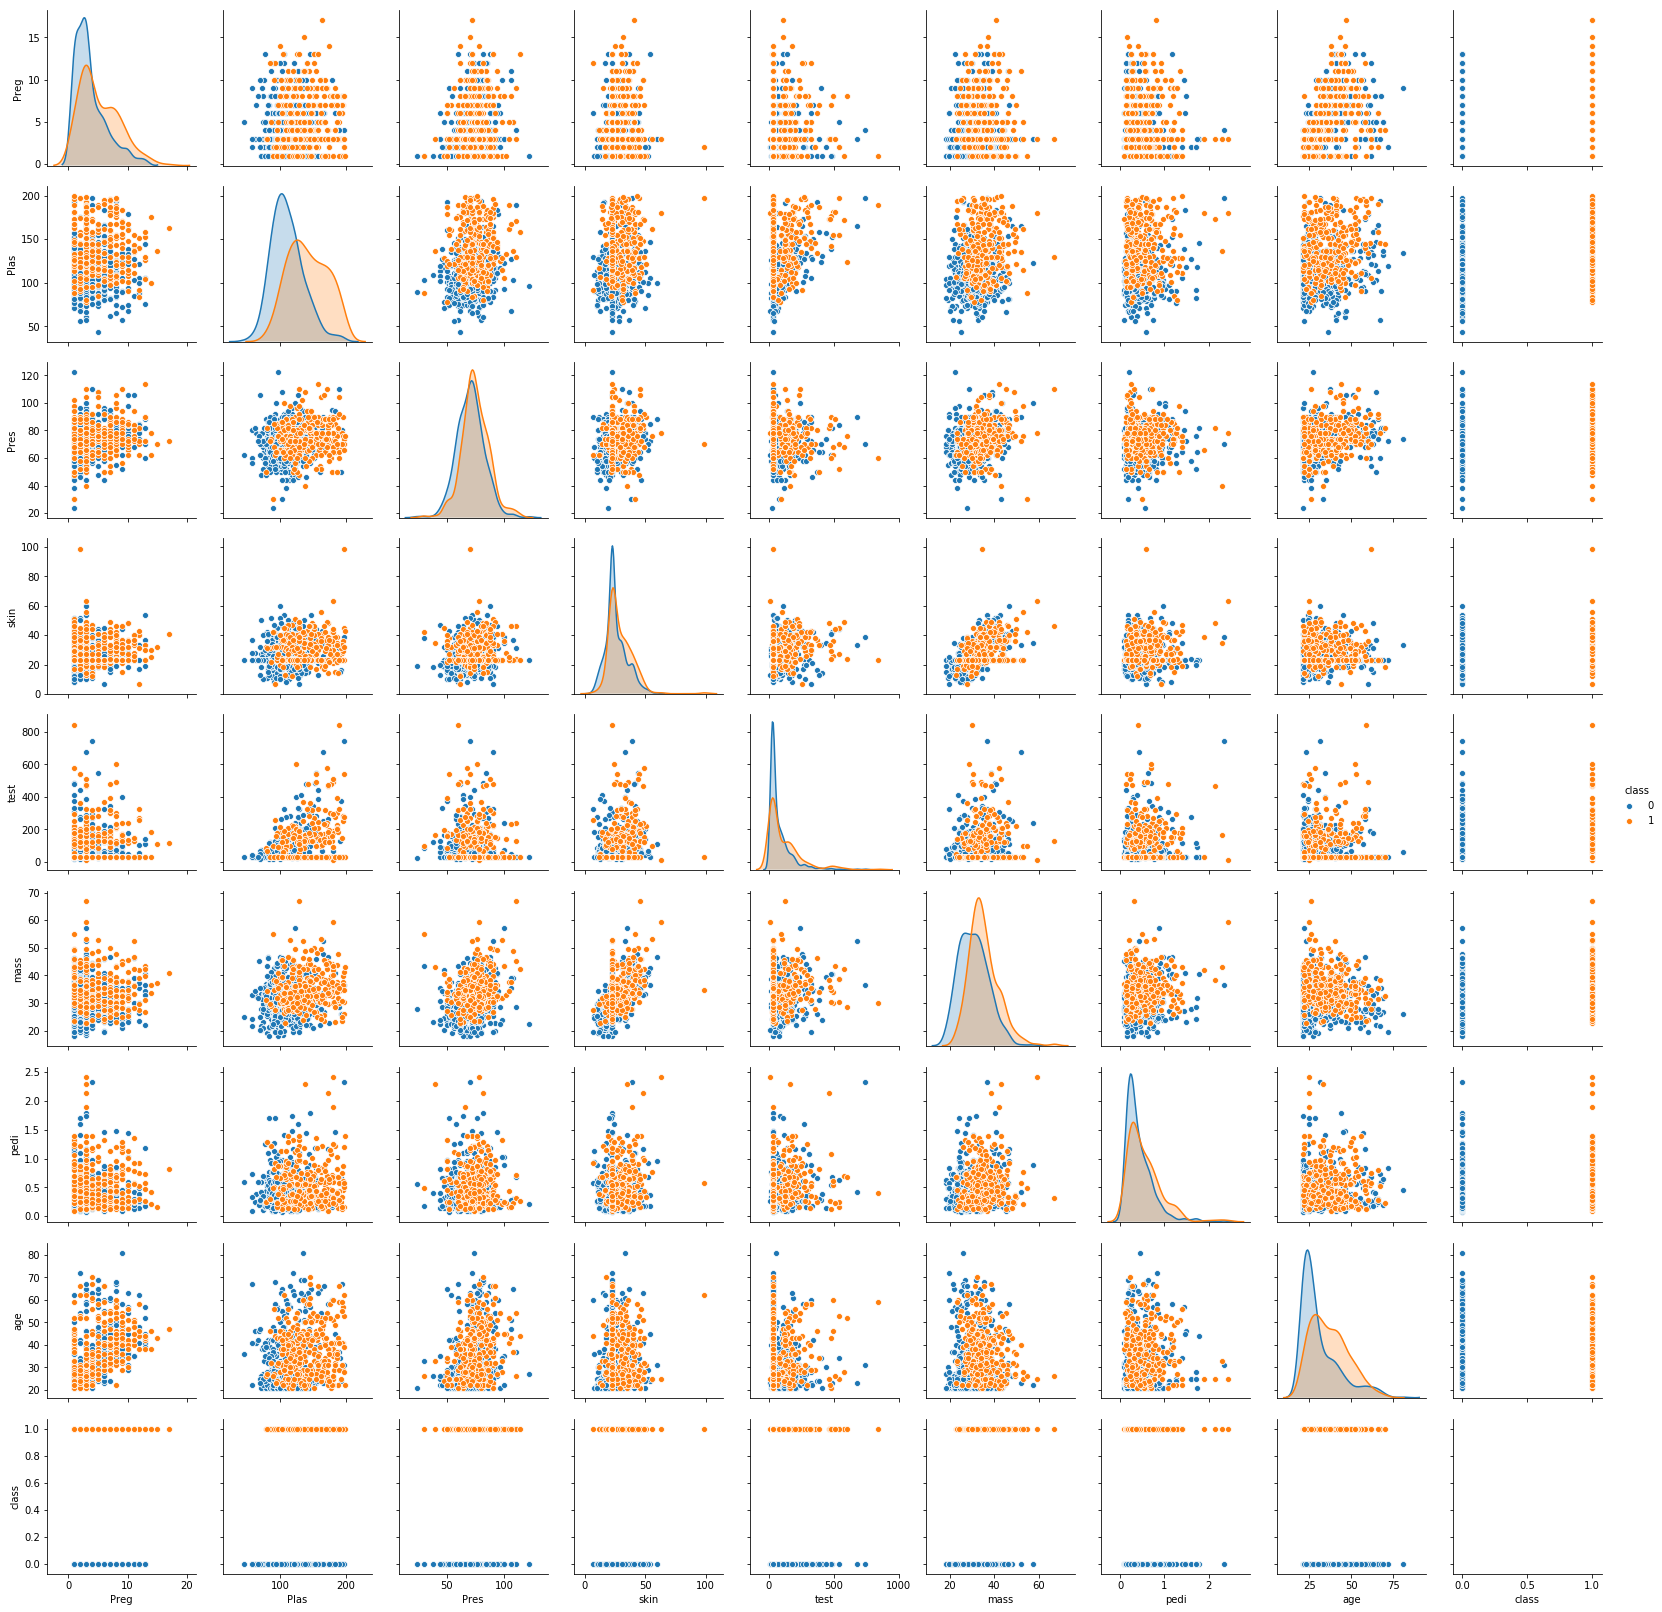

In [70]:
# Look at the distribution of class values and other attributes.
sns.pairplot(df, hue='class')

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [71]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:8].values
Y=df['class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [72]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [73]:
dt_model.score(X_test , Y_test)

0.7186147186147186

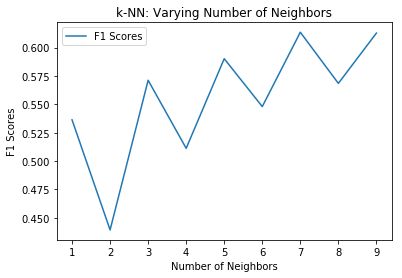

In [74]:
#F1-Score
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
neighbors = np.arange(1, 10)
f1_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    f1 = []
    for j in range(20):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,Y_train)
        predicted = knn.predict(scaledX_test)
        conf = confusion_matrix(Y_test,predicted)
        precision = conf[1,1]/(conf[1,1]+conf[0,1])
        recall = conf[1,1]/(conf[1,1]+conf[1,0])
        f1score = (2*precision*recall)/(precision+recall)
        f1.append(f1score)
    #Compute false negatives
    f1_plot[i] = np.mean(f1)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, f1_plot, label = 'F1 Scores')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Scores')
plt.show()

In [75]:
#Confusion Matrix. 
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test,predicted)
accuracy = (conf[0,0]+conf[1,1])/(conf[0,0]+conf[1,1]+conf[1,0]+conf[0,1])
precision = conf[1,1]/(conf[1,1]+conf[0,1])
recall = conf[1,1]/(conf[1,1]+conf[1,0])
f1 = (2*precision*recall)/(precision+recall)
print("Precision :",precision)
print("Recall :",recall)
print("f1 Score :",f1)
print("accuracy :",accuracy)

Precision : 0.676923076923077
Recall : 0.5714285714285714
f1 Score : 0.619718309859155
accuracy : 0.7662337662337663


Print the feature importance of the decision model - Optional